## Introduction

Toronto is a multi-cultural city, that is a financial capital of Canada. It is a vibrant business and activity hub that attracts people from all around the world. Every year millions of people visit this iconic city for business and tourism reasons. One of the most important things for every visitor is the accomodation options in the city, which is affordable, safe and has something to offer to its guests.

There are many hotels that are located right in the Toronto Downtown. These are not only the 4- or 5-star hotels, but even cheaper ones. But the overall situation is the following: due to high real estate prices, the hotel rates are not affordable to the most of the tourists. These rates are forcing visitors to look for a cheaper accomodation options on the outskirts of the Toronto city. This results with lower impression of the city due to:
-	Accesibility: some hotels on the outskirts have poor public transit coverage;
-	Private car is not being welcomed in the Toronto Downtown area – difficult to esplore the sights;
-	Takes too much time to get around the city;

In this Capstone project I will be exploring the Toronto Midtown (particularily the Mount Pleasant West neighborhood) as the place for a potential hotel development for international guests. Toronto Midtown is a green and vibrant area right outside the Downtown area that has a lot of the entartainment options as well. 
I will conduct a research of the neighborhoods in this area to understand their attractiveness. Using the Foursquare data will allow me to explore the local places of interest (such as restaurants, parks, cinemas) and the availability of the vital aspects such as nearby located subway stations, pharmacies, grocery shops, etc. 


## Data Description

To consider the problem we can list the following data sources:

- I used the Neighborhood Spatial Data provided by the City of Toronto. 

- Using the Foursquare data allowed me to explore the local places of interest (such as restaurants, parks, cinemas) and the availability of the vital aspects such as nearby located subway stations, pharmacies, grocery shops, etc.

- I used Forsquare API to get the most common venues of Toronto Neighborhoods.

- I used Google Map, ‘Search Nearby’ option to get the center coordinates of the each Borough.


In [10]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

print('Imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Imported.


Let's analyze the Neighborhood data of Toronto City.

At this stage I am using the list provided by the City of Toronto. This information contains neighborhood names, coordinates and other details. I have saved this data as a Neighborhood.csv file.

In [11]:
neighborhood = pd.read_csv('Neighbourhoods.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Let's take a look on the Neighborhood data.

In [12]:
neighborhood.head()

,AREA_CODE,Neighborhood,Longitude,Latitude
0,94,Wychwood,-79.425515,43.676919
1,100,Yonge-Eglinton,-79.403590,43.704689
2,97,Yonge-St.Clair,-79.397871,43.687859
3,27,York University Heights,-79.488883,43.765736
4,31,Yorkdale-Glen Park,-79.457108,43.714672


Here are the dataframe shape details. 

In [13]:
neighborhood.shape

(140, 4)

Using the Google Maps "Search Nearby" function, I have determined the coordinates of City of Toronto.

In [14]:
latitude = 43.6556
longitude = -79.3801

As a next step, I have created the Toronto map with all the neighborhoods positioned on in.

In [15]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(neighborhood['Latitude'], neighborhood['Longitude'], neighborhood['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)

toronto_map

## Foursquare

In [16]:

CLIENT_ID = 'DCPETAT2ZLJGSY2OKNARK42KKKEPO3LDTYPJ0ELJG4NRP20R' 
CLIENT_SECRET = 'KWJRPBNEMZUJDFTYFSTWSYFHZB404OG2UYUR0NLXUM5QFTJZ' 
VERSION = '20200524' 
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DCPETAT2ZLJGSY2OKNARK42KKKEPO3LDTYPJ0ELJG4NRP20R
CLIENT_SECRET:KWJRPBNEMZUJDFTYFSTWSYFHZB404OG2UYUR0NLXUM5QFTJZ


As part of my Capstone project, I am targeting on the Mount Pleasant West neighborhood to open the hotel. But before we get to that point, let's take a look on a city itself. <br>
Now, I would like to compare the neighborhoods and see, which ones have the most venues. Let's get the top 50 venues that are in each neigborhood within a radius of 800 meters

1+1

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)        
       
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Let's run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [18]:
toronto_venues = getNearbyVenues(names=neighborhood['Neighborhood'],
                                   latitudes=neighborhood['Latitude'],
                                   longitudes=neighborhood['Longitude']
                                  )


Wychwood
Yonge-Eglinton
Yonge-St.Clair
York University Heights
Yorkdale-Glen Park
Lambton Baby Point
Lansing-Westgate
Lawrence Park North
Lawrence Park South
Leaside-Bennington
Little Portugal
Long Branch
Malvern
Maple Leaf
Markland Wood
Milliken
Mimico
Morningside
Moss Park
Mount Dennis
Mount Olive-Silverstone-Jamestown
Mount Pleasant East
Mount Pleasant West
New Toronto
Newtonbrook East
Newtonbrook West
Niagara
North Riverdale
North St.James Town
O'Connor-Parkview
Oakridge
Oakwood Village
Old East York
Palmerston-Little Italy
Parkwoods-Donalda
Pelmo Park-Humberlea
Playter Estates-Danforth
Pleasant View
Princess-Rosethorn
Regent Park
Rexdale-Kipling
Rockcliffe-Smythe
Roncesvalles
Rosedale-Moore Park
Rouge
Runnymede-Bloor West Village
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Steeles
Stonegate-Queensway
Tam O'Shanter-Sullivan
Taylor-Massey
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Trinity-Bellwoods
University
Victoria Village
Waterfr

Let's check the size of the resulting dataframe

In [19]:
print(toronto_venues.shape)
toronto_venues.head()

(3388, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,Pukka Restaurant,43.681055,-79.429187,Indian Restaurant
3,Wychwood,43.676919,-79.425515,Hillcrest Park,43.676012,-79.424787,Park
4,Wychwood,43.676919,-79.425515,Ferro Bar Cafe,43.681080,-79.428570,Italian Restaurant


Next step is to check how many venues were returned for each neighborhood.

In [20]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,25,25,25,25,25,25
Agincourt South-Malvern West,29,29,29,29,29,29
Alderwood,18,18,18,18,18,18
Annex,50,50,50,50,50,50
Banbury-Don Mills,38,38,38,38,38,38
Bathurst Manor,5,5,5,5,5,5
Bay Street Corridor,50,50,50,50,50,50
Bayview Village,15,15,15,15,15,15
Bayview Woods-Steeles,5,5,5,5,5,5


It's good to know, how many unique categories can be curated from all the returned venues.

In [21]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 306 uniques categories.


Let's see the list of the neighborhoods that have the most of the venues (but not more than 50 as defined above).

In [22]:
toronto_total_venues = toronto_venues['Neighborhood'].value_counts().to_frame()
toronto_total_venues.rename(columns={'Neighborhood':'venue_count'}, inplace=True)
toronto_total_venues

,venue_count
Leaside-Bennington,50
The Beaches,50
Moss Park,50
Niagara,50
Mount Pleasant West,50
Playter Estates-Danforth,50
Blake-Jones,50
Church-Yonge Corridor,50
Trinity-Bellwoods,50
Dufferin Grove,50


As we can see here, Mount Pleasant West neighborhood is in top part of the list with the highest amount of venues. 

Let's analyze neighborhood venues in a little bit more details.

In [23]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Cou

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [24]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Syrian Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Cou

The new size of the dataframe is:

In [25]:
toronto_grouped.shape

(140, 306)

Let's see, which are the each neighborhood's top 5 most common venues:

In [26]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("=== "+hood+" ===")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

=== Agincourt North ===
                 venue  freq
0                 Bank  0.08
1   Chinese Restaurant  0.08
2           Beer Store  0.04
3  Sporting Goods Shop  0.04
4   Frozen Yogurt Shop  0.04


=== Agincourt South-Malvern West ===
                  venue  freq
0    Chinese Restaurant  0.21
1  Cantonese Restaurant  0.07
2                  Pool  0.03
3      Malay Restaurant  0.03
4                  Bank  0.03


=== Alderwood ===
               venue  freq
0        Pizza Place  0.11
1     Discount Store  0.11
2  Convenience Store  0.11
3       Skating Rink  0.06
4     Sandwich Place  0.06


=== Annex ===
                venue  freq
0  Italian Restaurant  0.08
1                Café  0.06
2           Bookstore  0.04
3         Coffee Shop  0.04
4         Pizza Place  0.04


=== Banbury-Don Mills ===
         venue  freq
0  Coffee Shop  0.11
1   Restaurant  0.08
2  Pizza Place  0.05
3         Bank  0.05
4         Café  0.05


=== Bathurst Manor ===
               venue  freq
0        Me

Going through the results we can see that restaurants and coffee shops are among the most popular venues in many neighborhoods.

As a next step, we will put that data into the pandas dataframe. But in order to have data in the most desirable form, let's place it into the descending order.

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

And now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Bank,Chinese Restaurant,Discount Store,Fast Food Restaurant,Sporting Goods Shop,Sandwich Place,Fried Chicken Joint,Frozen Yogurt Shop,Movie Theater,Beer Store
1,Agincourt South-Malvern West,Chinese Restaurant,Cantonese Restaurant,Breakfast Spot,Restaurant,Japanese Restaurant,Sandwich Place,Bank,Bakery,Badminton Court,Latin American Restaurant
2,Alderwood,Convenience Store,Pizza Place,Discount Store,Park,Shopping Mall,Skating Rink,Coffee Shop,Athletics & Sports,Sandwich Place,Gym
3,Annex,Italian Restaurant,Café,Pizza Place,Bookstore,Vegetarian / Vegan Restaurant,Grocery Store,Coffee Shop,Middle Eastern Restaurant,Japanese Restaurant,Bike Shop
4,Banbury-Don Mills,Coffee Shop,Restaurant,Pizza Place,Bank,Café,Sandwich Place,Intersection,Shopping Mall,Italian Restaurant,Liquor Store


## Clustering

Let's run k-means to cluster the neighborhood into 5 clusters.

In [29]:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 3, 0, 3, 3, 2, 3, 2, 2, 3], dtype=int32)

Once we got that, let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [30]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head() # check the last columns!

,AREA_CODE,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94,Wychwood,-79.425515,43.676919,3,Italian Restaurant,Bakery,Coffee Shop,Mexican Restaurant,Sushi Restaurant,Bar,Café,Indian Restaurant,Grocery Store,Ice Cream Shop
1,100,Yonge-Eglinton,-79.403590,43.704689,3,Italian Restaurant,Coffee Shop,Bakery,Deli / Bodega,Restaurant,Japanese Restaurant,Sushi Restaurant,Bookstore,Movie Theater,Middle Eastern Restaurant
2,97,Yonge-St.Clair,-79.397871,43.687859,3,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Grocery Store,Restaurant,Pub,Spa,Gym,Sandwich Place
3,27,York University Heights,-79.488883,43.765736,0,Furniture / Home Store,Pizza Place,Bar,Coffee Shop,Japanese Restaurant,Caribbean Restaurant,Fast Food Restaurant,Massage Studio,Miscellaneous Shop,Market
4,31,Yorkdale-Glen Park,-79.457108,43.714672,3,Restaurant,Fast Food Restaurant,Furniture / Home Store,Dessert Shop,Italian Restaurant,Grocery Store,Bowling Alley,Event Space,Cheese Shop,Bank


Great. It would be good to visualize that on a city map. For these purposes I am using the folium library.

In [31]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Mount Pleasant West and other neighborhoods that are included included into the Cluster #3 have the highest amount of the venues. As we can see on the map, most of this cluster member neighborhoods are located in the Downtown area. As mentioned at the beginning, the price of a real estate in the Downtown is very high, which would result in the high accommodation fees. This is not the best scenario, so we will stick to initial plan to consider Mount Pleasant West neighborhood for a future hotel site.

### Explore Mount Pleasant Neighborhood

Let's explore the Mount Pleasant West neighborhood and see, that it has to offer.

The neighborhood coordinates are provided by the City of Toronto.


In [33]:
neighborhood.head(30)

,AREA_CODE,Neighborhood,Longitude,Latitude
0,94,Wychwood,-79.425515,43.676919
1,100,Yonge-Eglinton,-79.403590,43.704689
2,97,Yonge-St.Clair,-79.397871,43.687859
3,27,York University Heights,-79.488883,43.765736
4,31,Yorkdale-Glen Park,-79.457108,43.714672
5,114,Lambton Baby Point,-79.496045,43.657420
6,38,Lansing-Westgate,-79.424748,43.754271
7,105,Lawrence Park North,-79.403978,43.730060
8,103,Lawrence Park South,-79.406039,43.717212
9,56,Leaside-Bennington,-79.366072,43.703797


In [34]:
neighborhood.loc[22, 'Neighborhood']

'Mount Pleasant West'

In [35]:
MPW_latitude = neighborhood.loc[22, 'Latitude']
MPW_longitude = neighborhood.loc[22, 'Longitude']

MPW_name = neighborhood.loc[22,'Neighborhood']

print('Latitude and longitude values of {} are {},{}'.format(MPW_name,
                                                            MPW_latitude,
                                                            MPW_longitude))

Latitude and longitude values of Mount Pleasant West are 43.70443517,-79.39335955


Now, let's get the top 100 venues that are located within a radius of 1000 meters of the Neighborhood center.

In [36]:
LIMIT1 = 100
radius1 = 1000
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    MPW_latitude, 
    MPW_longitude, 
    radius1, 
    LIMIT1)
url1

'https://api.foursquare.com/v2/venues/explore?&client_id=DCPETAT2ZLJGSY2OKNARK42KKKEPO3LDTYPJ0ELJG4NRP20R&client_secret=KWJRPBNEMZUJDFTYFSTWSYFHZB404OG2UYUR0NLXUM5QFTJZ&v=20200524&ll=43.70443517,-79.39335955&radius=1000&limit=100'

In [37]:
results_MPW = requests.get(url1).json()
results_MPW

{'meta': {'code': 200, 'requestId': '5ecabf9a618f43001bc9713c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Davisville',
  'headerFullLocation': 'Davisville, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 54,
  'suggestedBounds': {'ne': {'lat': 43.713435179000015,
    'lng': -79.38093316299906},
   'sw': {'lat': 43.69543516099999, 'lng': -79.40578593700094}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5bdcf092cb3fd2002c311f71',
       'name': 'Bar Buca',
       'location': {'address': '101 Eglinton Ave E',
        'lat': 43.706961,
        'lng': -79.394808,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.706961,
          '

This data has been obtained using the Foursquare API.

In [38]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

And now, let's see the venues that are located within the 1000m from the Mount Pleasant West Neighborhood center.

In [39]:
venues = results_MPW['response']['groups'][0]['items']

nearby_venues_MPW = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_MPW = nearby_venues_MPW.loc[:, filtered_columns]

nearby_venues_MPW['venue.categories'] = nearby_venues_MPW.apply(get_category_type, axis=1)

nearby_venues_MPW.columns = [col.split(".")[-1] for col in nearby_venues_MPW.columns]

nearby_venues_MPW.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Bar Buca,Italian Restaurant,43.706961,-79.394808
1,Jules Cafe Patisserie,Dessert Shop,43.704138,-79.388413
2,Loblaws,Supermarket,43.707244,-79.394701
3,Istanbul Cafe & Espresso Bar,Café,43.707891,-79.393049
4,Thobors Boulangerie Patisserie Café,Café,43.704514,-79.388616


In [40]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_MPW.shape[0]))

54 venues were returned by Foursquare.


Let's categorize the venues.

In [41]:
MPW_count = nearby_venues_MPW['categories'].value_counts().to_frame()
MPW_count.rename(columns={'categories':'venue_count'}, inplace=True)
MPW_count

,venue_count
Italian Restaurant,6
Coffee Shop,3
Restaurant,3
Bookstore,2
Dessert Shop,2
Deli / Bodega,2
Pizza Place,2
Café,2
Gym,2
Park,2


Looks good. But having the Bar chart would give us a better picture.

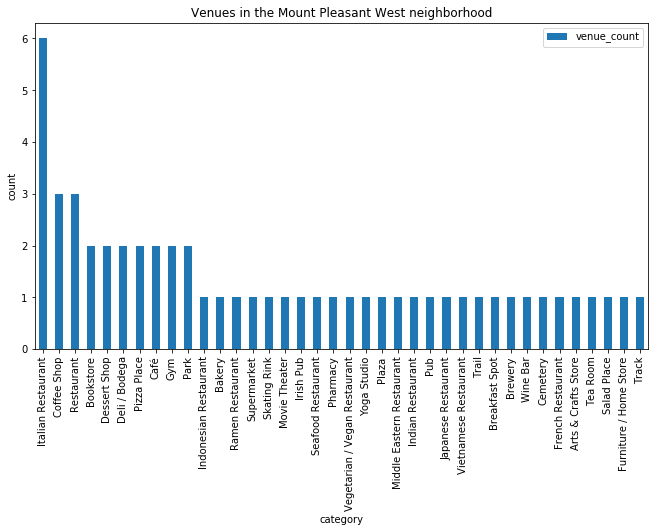

In [42]:
MPW_count.plot(kind='bar', figsize=(11, 6))

plt.xlabel('category') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Venues in the Mount Pleasant West neighborhood') # add title to the plot

plt.show()

As we can see from the output, there are a lot of diverse venues located in the vicinity.

Toronto is a megapolis that is very dence in the Downtown area. This leads to a various limitations that are applied to a usage of a private automobile in the Downtown core. So to have a great access to a commercial district as well as the local sights (CN Tower, Waterfront), let's see, whether there is a rapid transit access nearby. <br>
Toronto Transit Commision (TTC) provides the public transit services in the City of Toronto. That's why "TTC Station" will be used in the query.<br>
Let's see if there is any TTC Subway station located within the 500 meters.

In [43]:
search_query = 'TTC Station'
TTC_radius = 500
print(search_query + ' .... OK!')

TTC Station .... OK!


In [44]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, MPW_latitude, MPW_longitude, VERSION, search_query, TTC_radius, LIMIT)
url2

'https://api.foursquare.com/v2/venues/search?client_id=DCPETAT2ZLJGSY2OKNARK42KKKEPO3LDTYPJ0ELJG4NRP20R&client_secret=KWJRPBNEMZUJDFTYFSTWSYFHZB404OG2UYUR0NLXUM5QFTJZ&ll=43.70443517,-79.39335955&v=20200524&query=TTC Station&radius=500&limit=50'

In [45]:
results_ttc = requests.get(url2).json()
results_ttc

{'meta': {'code': 200, 'requestId': '5ecabf1698205d001bf856cb'},
 'response': {'venues': [{'id': '4ae65f95f964a520bfa621e3',
    'name': 'Eglinton Subway Station',
    'location': {'address': '2190 Yonge St',
     'crossStreet': 'at Eglinton Ave',
     'lat': 43.706702649681596,
     'lng': -79.39844991295426,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.706702649681596,
       'lng': -79.39844991295426}],
     'distance': 481,
     'postalCode': 'M4V 2E3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['2190 Yonge St (at Eglinton Ave)',
      'Toronto ON M4V 2E3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1fd931735',
      'name': 'Metro Station',
      'pluralName': 'Metro Stations',
      'shortName': 'Metro',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590345828',
    'hasP

## Results and Discussion

My analysis shows that Mount Pleasant West neighborhood is a perfect location for the future hotel development. There are many venues that are at guests disposal - restaurants and cafes offer a wide variety of cuisines. After the clustering study, we can conclude that this is one of the most dense dining place areas outside the Downtown core, which is very attractive for future hotel guests. <br>

Foursquare API helped me to get to explore the neighborhood venues. Hotel guests can access the local gym for the indoor sports activities. But this is not the only option - there is also a park nearby, that enables to take a deep breath and enjoy the great outdoors.

As we can see from the output, there is a Eglinton Subway station located just 481 meters away from the Neighborhood center. Toronto is a megapolis and using the private automobile in the Downtown area is complicated. So, to have the direct, easy and reliable access, TTC subway is a great option. Having a rapid transit station in the neighborhood makes the are more attractive.


## Conclusion
Purpose of this project was to identify the Mount Pleasant West neighborhood of the City of Toronto as a suitable location for a future Hotel location. There are various venues located in the area that can serve as recreation places. <br>
Final hotel location depends on the various factors, such as real estate availability and the stakeholders decision.